# Laboratory practice № 6 (Nyquist criterion and delayed systems)

Done by Vladislav Diuzhev (isu: 336225, group: R33353)

Variant: 16

## Preparation

In [1]:
import matplotlib.pyplot as plt
import control as ctrl
import sympy
import numpy as np
from sympy.utilities.lambdify import lambdify
from matplotlib.ticker import FormatStrFormatter

In [2]:
dt = 0.001

In [3]:
def plot_time_characteristics(W_sys, time_arr,title, x_form = None):
    ir = ctrl.impulse_response(W_sys,time_arr).outputs
    sr = ctrl.step_response(W_sys,time_arr).outputs
    
    fig, ax = plt.subplots(1,2,figsize=(12, 5))
    fig.suptitle(f"Time characteristics for {title}")
    
    ax[0].plot(time_arr,ir,'r--',label="Modeling",linewidth=2)
    ax[0].grid(True)
    ax[0].legend()
    ax[0].set_title("Weight function (impulse response)")
    ax[0].set_xlabel("$t$")
    ax[0].set_ylabel("$y(t)$")
    
    ax[1].plot(time_arr,sr,'r--',label="Modeling",linewidth=2)
    ax[1].grid(True)
    ax[1].legend()
    ax[1].set_title("Step response")
    ax[1].set_xlabel("$t$")
    ax[1].set_ylabel("$y(t)$")
    
    if x_form is not None:
        ax[0].xaxis.set_major_formatter(x_form)
        ax[1].xaxis.set_major_formatter(x_form)

## Task 1 (Nyquist godograph)

In [4]:
modeling_time_1 = 10 # sec
time_1 = np.linspace(0,modeling_time_1,int(modeling_time_1/dt))

In [5]:
s = ctrl.tf([1,0],[1])

In [6]:
sys_den = (s-1)*(s-2)*(s-3)*(s-4)*(s+5)
sys_closed_den = (s+7)*(s+8)*(s+9)*(s+10)*(s-6)
sys_num = sys_closed_den - sys_den
W_1 = sys_num/sys_den
W_1

TransferFunction(array([    33,    242,   -297,  -9218, -30360]), array([   1,   -5,  -15,  125, -226,  120]))

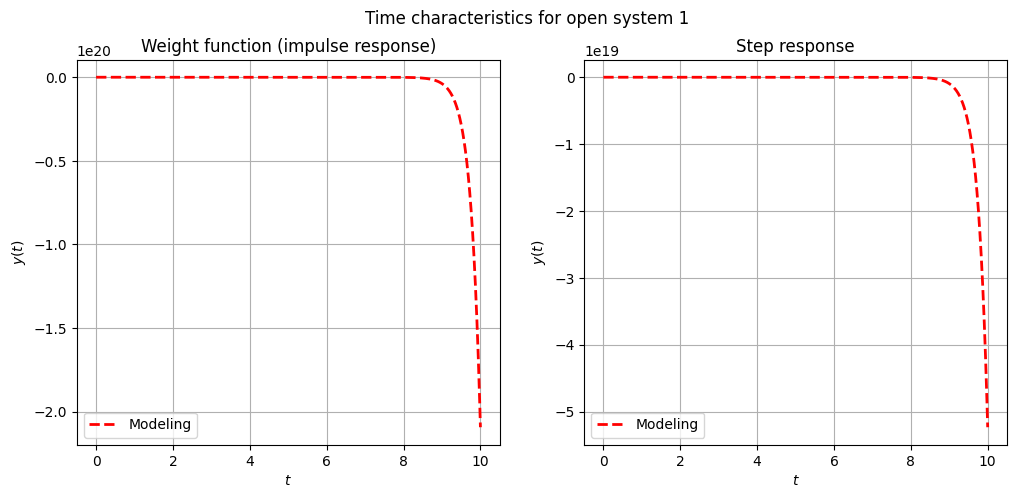

In [7]:
plot_time_characteristics(W_1,time_1,"open system 1")

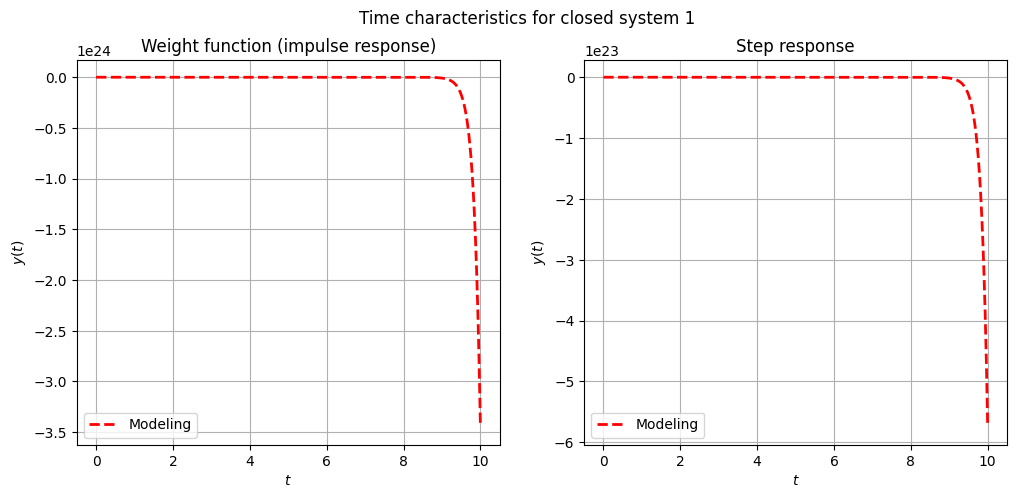

In [8]:
plot_time_characteristics(ctrl.feedback(W_1),time_1,"closed system 1")

-3

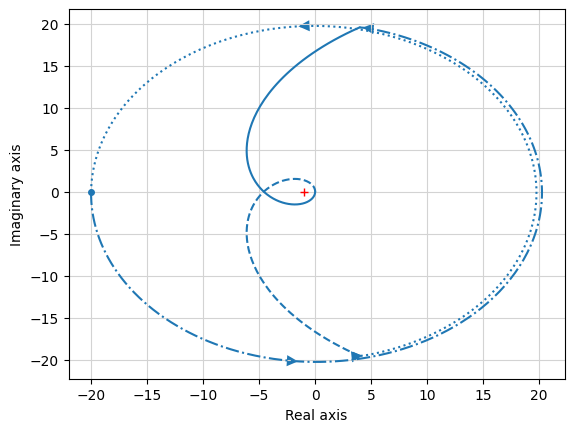

In [9]:
ctrl.nyquist(W_1)

In [10]:
sys_den = (s+1)*(s+2)*(s+3)*(s+4)*(s+5)
sys_closed_den = (s+7)*(s+8)*(s+9)*(s+10)*(s-6)
sys_num = sys_closed_den - sys_den
W_2 = sys_num/sys_den
W_2

TransferFunction(array([    13,    142,   -397,  -9718, -30360]), array([  1,  15,  85, 225, 274, 120]))

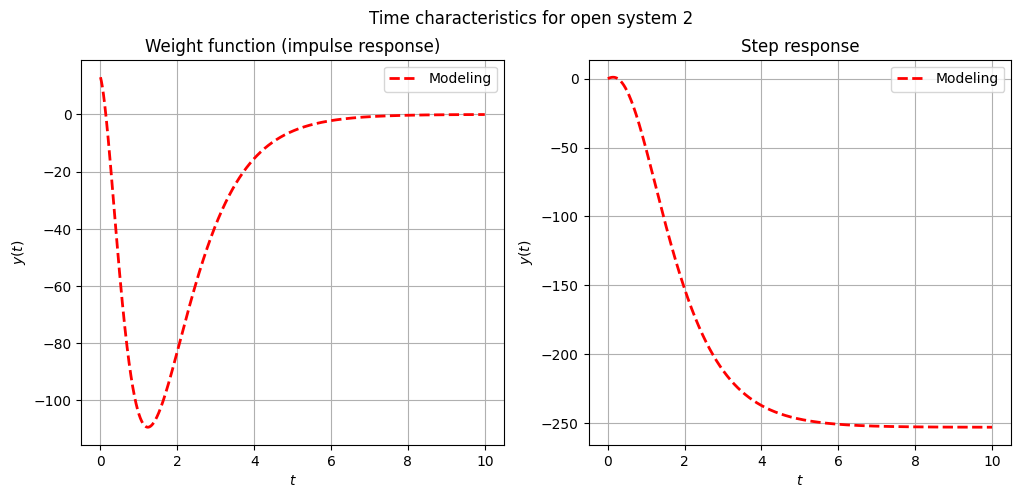

In [11]:
plot_time_characteristics(W_2,time_1,"open system 2")

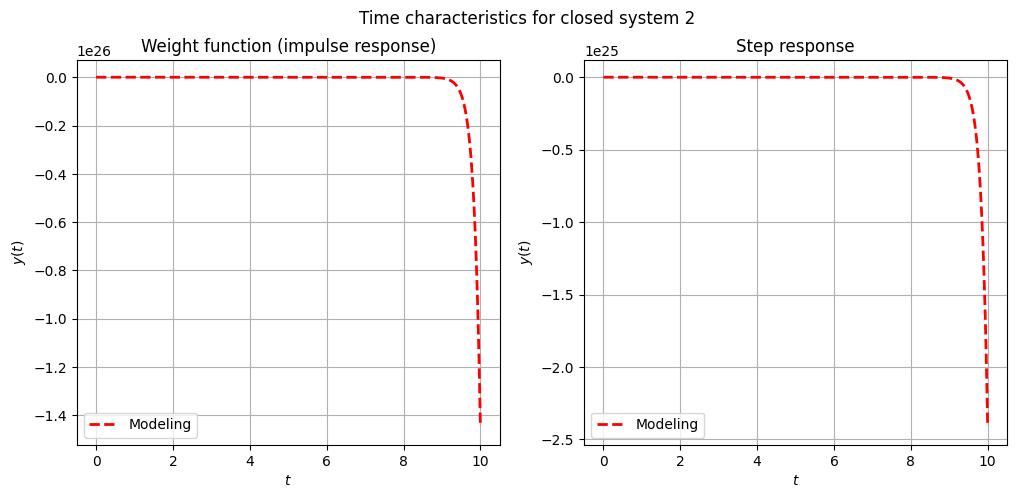

In [12]:
plot_time_characteristics(ctrl.feedback(W_2),time_1,"closed system 2")

1

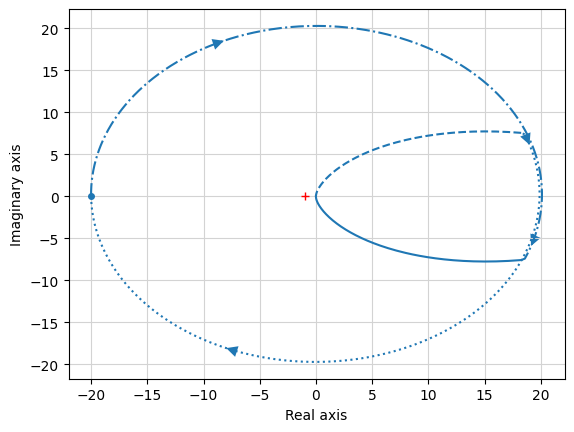

In [13]:
ctrl.nyquist(W_2)

In [14]:
sys_den = (s-1)*(s-2)*(s-3)*(s-4)*(s+5)
sys_closed_den = (s+7)*(s+8)*(s+9)*(s+10)*(s+6)
sys_num = sys_closed_den - sys_den
W_3 = sys_num/sys_den
W_3

TransferFunction(array([   45,   650,  4875, 19750, 30120]), array([   1,   -5,  -15,  125, -226,  120]))

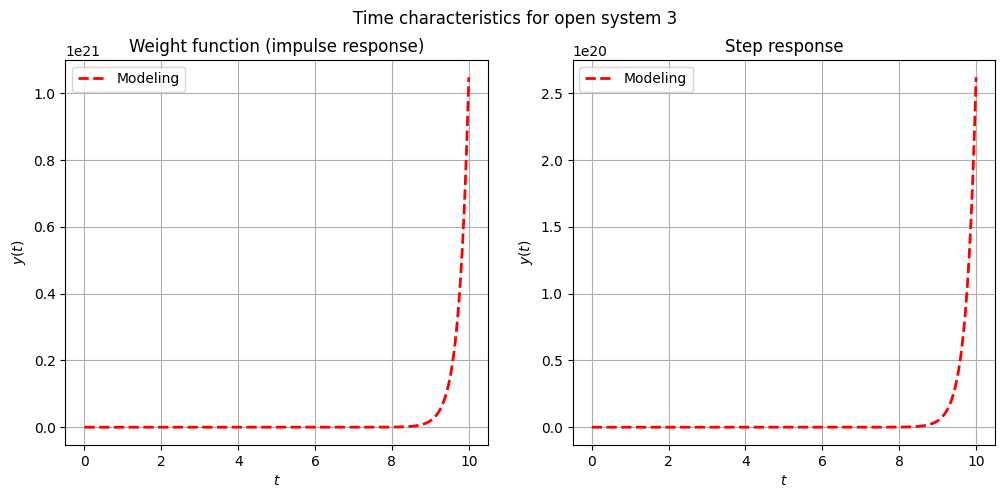

In [15]:
plot_time_characteristics(W_3,time_1,"open system 3")

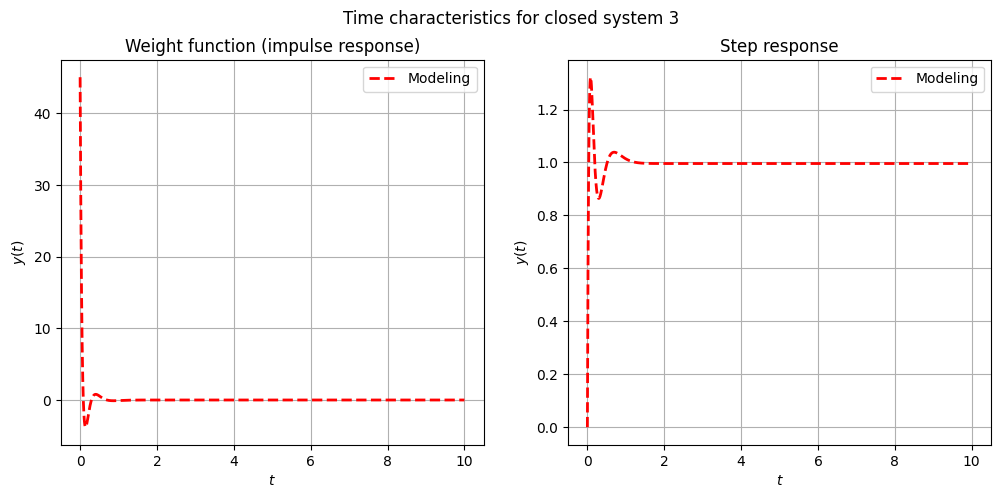

In [16]:
plot_time_characteristics(ctrl.feedback(W_3),time_1,"closed system 3")

-4

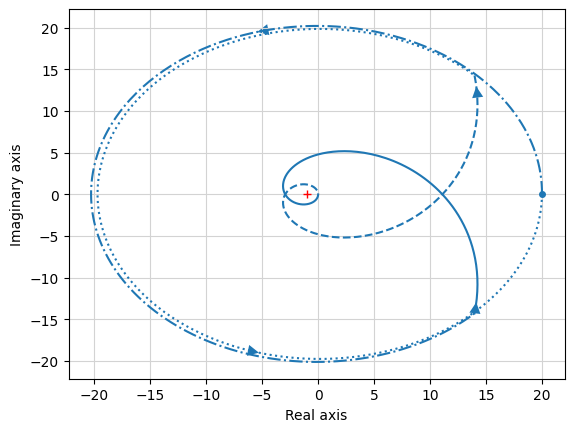

In [17]:
ctrl.nyquist(W_3)

## Task 2 (Gain)

In [32]:
W_1 = (s-1)/(s**2+6*s+5)

0

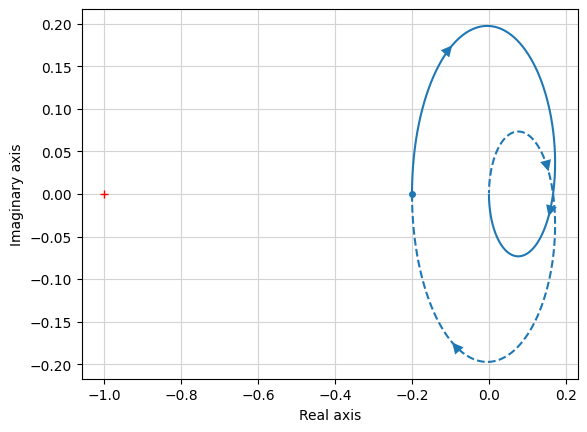

In [33]:
ctrl.nyquist(W_1)

0

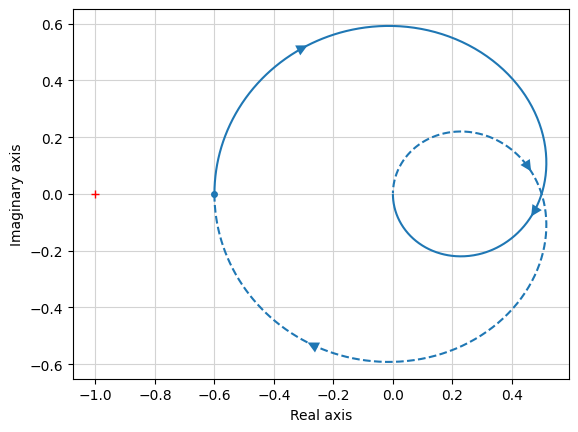

In [39]:
ctrl.nyquist(W_1*3)

1

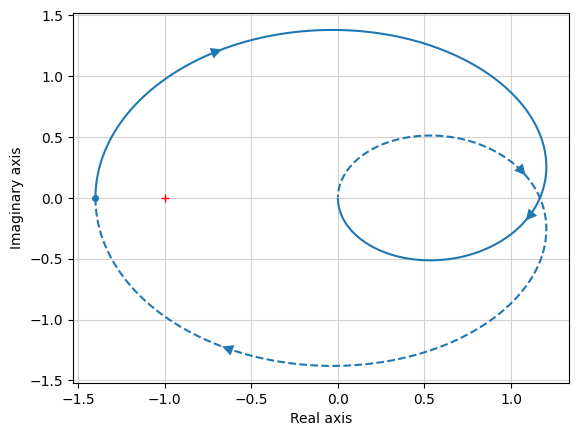

In [38]:
ctrl.nyquist(W_1*7)

In [34]:
ctrl.stability_margins(W_1)

(5.0, inf, inf, 0.0, nan, nan)

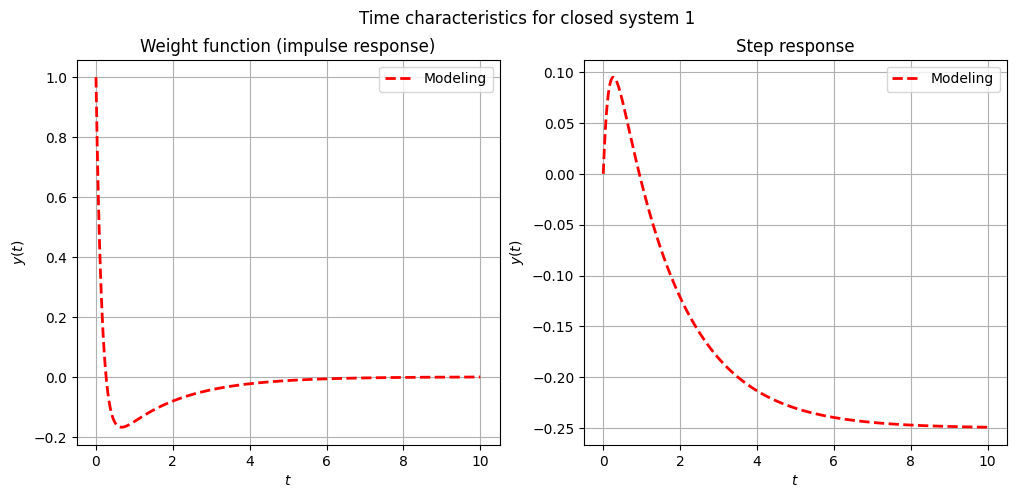

In [40]:
plot_time_characteristics(ctrl.feedback(W_1),time_1,"closed system 1")

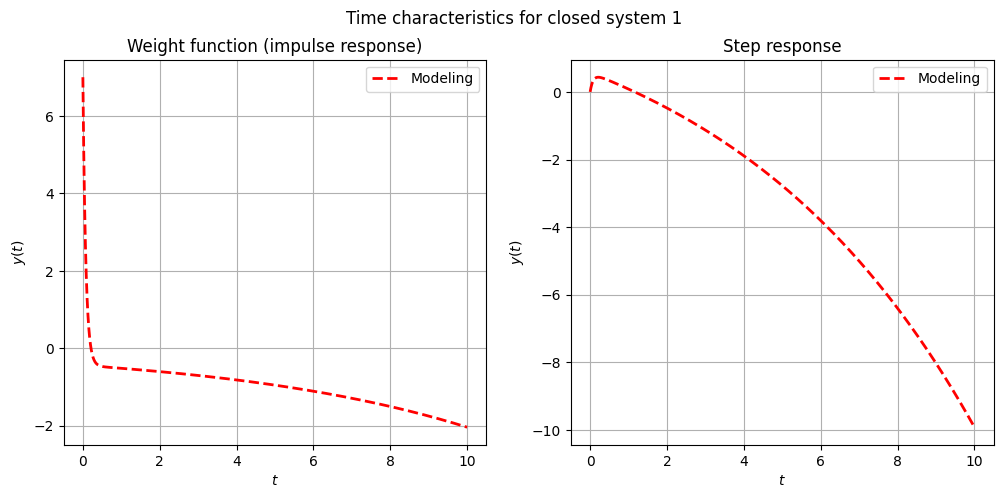

In [41]:
plot_time_characteristics(ctrl.feedback(W_1*7),time_1,"closed system 1")

### Task 3 (Delay)